In [ ]:
#Backtesting code

commision = 0.15
def getCompleteInfo3Compound(df): #assumes signal represents entry/exit, PNL= (Exit Price−Entry Price) ×  Investment amount/Entry price, 0.1%comission
  global numberOfTrades, numberOfWinningTrades, numberOfLosingTrades, averageWinningTrade, averageLosingTrade, maxWinningTrade, maxLosingTrade, averageHoldOut, signal_column, cash, position, portfolio
  global lastPrice,priceColumn,investmentAmount,initialCash
  startInvestment = 1000
  investmentAmount = initialCash
  multipleBuys = False
  multipleSells = False
  currentHoldOut = 0
  entryPrice = 0
  exitPrice=0
  currentHoldOut = 0
  for index,row in df.iterrows():
    investmentAmount = cash
    signal = row[signal_column]
    currPrice = row[priceColumn]
    if position==0:
      portfolio.append(cash)
      if signal==1:
        position=1
        entryPrice = currPrice
        currentHoldOut=1
      elif signal==-1:
        position=-1
        currentHoldOut=1
        exitPrice = currPrice
    elif position==1:
      portfolio.append(cash-investmentAmount+investmentAmount/entryPrice*currPrice)
      if signal==0:
        currentHoldOut+=1
      elif signal==-1:
        currentHoldOut+=1
        averageHoldOut = (averageHoldOut*numberOfTrades + currentHoldOut)/(numberOfTrades+1)
        currentHoldOut=0
        numberOfTrades+=1
        change = investmentAmount/entryPrice*(currPrice-entryPrice)
        cash+=change
        cash-=commision/100*investmentAmount
        position=0
        if change>0:
          averageWinningTrade = (averageWinningTrade*numberOfWinningTrades+change)/(numberOfWinningTrades+1)
          numberOfWinningTrades+=1
          maxWinningTrade = max(maxWinningTrade,change)
        elif change<0:
          change*=-1
          averageLosingTrade = (averageLosingTrade*numberOfLosingTrades+change)/(numberOfLosingTrades+1)
          numberOfLosingTrades+=1
          maxLosingTrade = max(maxLosingTrade, change)
      else:
        multipleBuys = True
    elif position==-1:
      portfolio.append(cash-investmentAmount+investmentAmount/currPrice*exitPrice)
      if signal==0:
        currentHoldOut+=1
      elif signal==1:
        currentHoldOut+=1
        averageHoldOut = (averageHoldOut*numberOfTrades + currentHoldOut)/(numberOfTrades+1)
        currentHoldOut=0
        numberOfTrades+=1
        change = investmentAmount/currPrice*(exitPrice-currPrice)
        cash+=change
        cash-=commision/100*investmentAmount
        position=0
        if change>0:
          averageWinningTrade = (averageWinningTrade*numberOfWinningTrades+change)/(numberOfWinningTrades+1)
          numberOfWinningTrades+=1
          maxWinningTrade = max(maxWinningTrade,change)
        elif change<0:
          change*=-1
          averageLosingTrade = (averageLosingTrade*numberOfLosingTrades+change)/(numberOfLosingTrades+1)
          numberOfLosingTrades+=1
          maxLosingTrade = max(maxLosingTrade, change)
      else:
        multipleSells = True
  df['portfolio']= portfolio
  if multipleBuys:
    print("Your signals attempt to hold more than 1 position")
  if multipleSells:
    print("Your signals attempt to sell more than 1 position")
  investmentAmount = startInvestment
  print(numberOfTrades)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df_hour = pd.read_csv("/content/drive/MyDrive/btcusdt_1h.csv")
df_hour["datetime"] = pd.to_datetime(df_hour["datetime"])
df_hour.set_index("datetime", inplace = True)
df_hour.shape

# Resampling to daily  frequency
df_day = pd.DataFrame()
df_day['open'] = df_hour.resample("D").open.first()
df_day['close'] = df_hour.resample("D").close.last()
df_day['high']=df_hour.resample("D").high.max()
df_day['low'] = df_hour.resample("D").low.min()
df_day['volume'] = df_hour.resample("D").volume.sum()
df_day.reset_index(inplace=True)
df_hour.reset_index(inplace=True)



In [ ]:
def cmf(df, thresh=0):
    signals = np.zeros(df.shape[0])
    MFV = df.volume*(2*df.close - df.low - df.high)/(df.high - df.low)
    res = MFV.rolling(20).sum()/df.volume.rolling(20).sum()
    pos = 0
    for i in range(signals.shape[0]-1):
        if res[i] > thresh and pos != 1:
            signals[i+1] = 1
            pos += 1
        elif res[i] < -thresh and pos != -1:
            signals[i+1] = -1
            pos -= 1
    signals[-1] = 1
    df['signals'] = signals
    return df


87


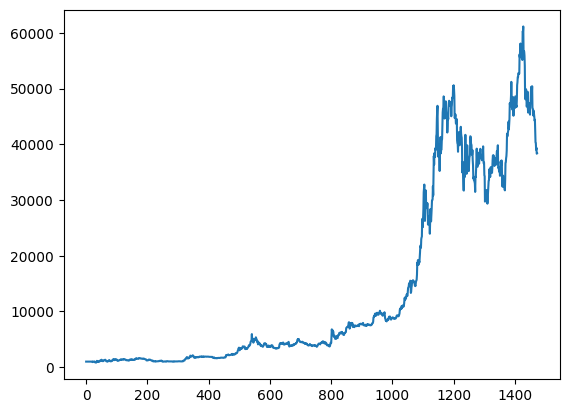

In [ ]:
df_with_signal = cmf(df_day)
numberOfTrades = 0
numberOfWinningTrades = 0
numberOfLosingTrades = 0
averageWinningTrade = 0.0
averageLosingTrade = 0.0
maxWinningTrade = 0.0
maxLosingTrade = 0.0
averageHoldOut = 0.0
lastPrice = 0.0
signal_column = 'signals'
initialCash = 1000
cash = initialCash
position = 0
portfolio = []
count = 0
maxDrawDown = 0.0
sharpeRatio = 0.0
sortinioRatio=0.0
priceColumn = 'close'
investmentAmount=1000
getCompleteInfo3Compound(df_with_signal)
plt.plot(df_with_signal['portfolio'], label='Portfolio Value')

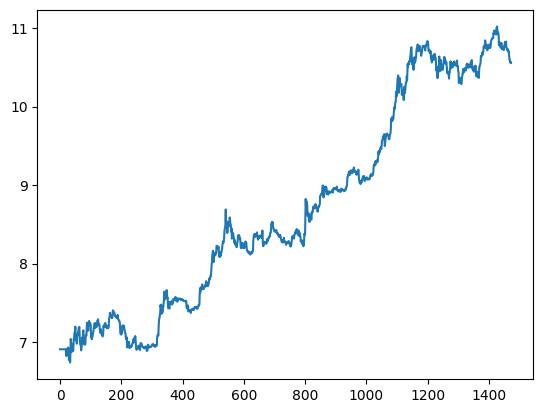

In [ ]:
plt.plot(np.log(df_with_signal['portfolio']), label='log-Portfolio Value')

870


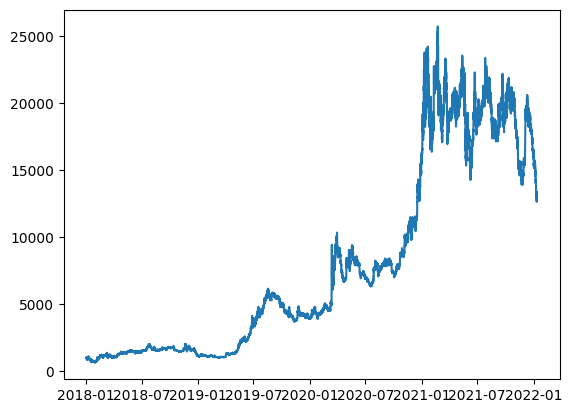

In [ ]:
#############

#different strategy

df_with_signal2 = cmf(df_hour, 0.07)
numberOfTrades = 0
numberOfWinningTrades = 0
numberOfLosingTrades = 0
averageWinningTrade = 0.0
averageLosingTrade = 0.0
maxWinningTrade = 0.0
maxLosingTrade = 0.0
averageHoldOut = 0.0
lastPrice = 0.0
signal_column = 'signals'
initialCash = 1000
cash = initialCash
position = 0
portfolio = []
count = 0
maxDrawDown = 0.0
sharpeRatio = 0.0
sortinioRatio=0.0
priceColumn = 'close'
investmentAmount=1000
getCompleteInfo3Compound(df_with_signal2)
plt.plot(df_with_signal2['portfolio'], label='Portfolio Value')

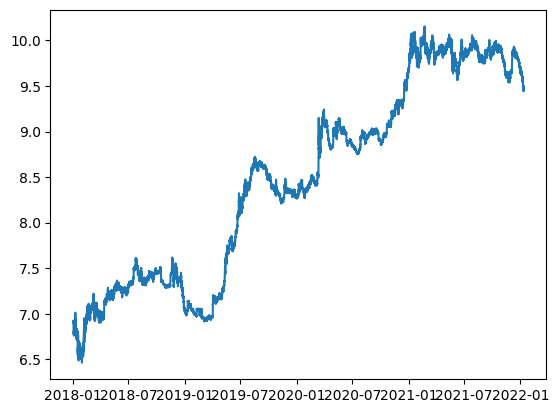

In [ ]:
plt.plot(np.log(df_with_signal2['portfolio']), label='log-Portfolio Value')